In [1]:
#cargo paquetes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


### Cargo dataset
- Items
- Categorias

In [2]:
items_dataset_filename= 'items_featselected.csv.gz'
categories_dataset_filename = 'categories.csv'

items = pd.read_csv(items_dataset_filename)
categories = pd.read_csv(categories_dataset_filename, index_col = 0)


/Users/juanfrittaoni/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#Realizo join para traer nombre de categorías y categorías generales
items_categories = items.merge(categories, left_on = 'categoria_id', right_on = 'id', how = 'inner')

## Análisis Exploratorio

In [4]:
#Funciones auxiliares

#funcion para agrupar y calular agregaciones: propocion de productos con descuento, valor descuento promedio
def agrup(base, variable_corte):
    base_agrup = base.groupby(by=variable_corte).agg({'flg_descuento': 'sum', 'id_x':'count', 'valor_descuento': 'mean'})
    base_agrup['pct_con_descuento'] = base_agrup.flg_descuento / base_agrup.id_x
    return base_agrup

#funcion para grafico de barras
def grafico_agrup(y, n_groups, title):
    y_ = y.sort_values(ascending=False)[:n_groups]
    x = y_.index
    sns.set_style('whitegrid')
    ax= sns.barplot(x, y_ , color='blue', order=list(x))
    ax.axhline(y.mean(), ls='--', c= "grey")
    ax.set(xlabel='', ylabel='')
    ax.axes.set_title(title,fontsize=20, loc='left')
    ax.set_xticklabels( labels= x, rotation=30, horizontalalignment='right')
    ax.set(yticklabels=[])  
    ax.tick_params(left=False) 
    sns.despine(left=True)
    for i in range(n_groups):
        plt.text(x = i-0.2 , y = y_[i], s = round(y_[i], 3), size=20, rotation=30)
    
    plt.show()

### Análisis por Categorías Generales

In [5]:
print('Existen {} categorías generales'.format(len(set(items_categories.mother_name))))

Existen 31 categorías generales


In [6]:
agrup_categorias_general = agrup(items_categories, 'mother_name')

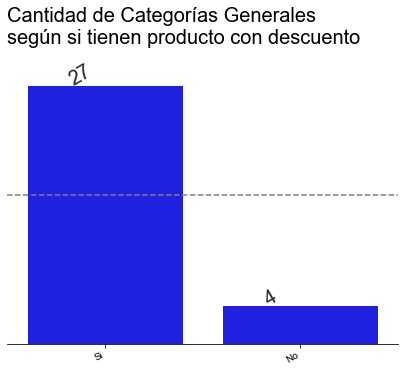

In [7]:
plt.subplots(figsize=(7, 5))
a = pd.Series(pd.DataFrame(agrup_categorias_general.flg_descuento.apply(lambda x: x >0)).groupby('flg_descuento').size()).sort_values(ascending = False).rename(index = {True: 'Si', False:'No'})
grafico_agrup(a,2,'Cantidad de Categorías Generales\nsegún si tienen producto con descuento\n')

Observamos que casi el 90% de las categorías generales tienen algún artículo con descuento

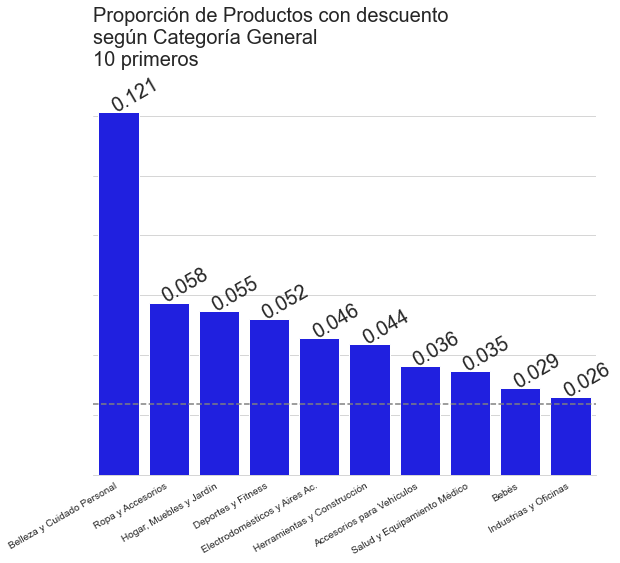

In [8]:
plt.subplots(figsize=(9, 7))
grafico_agrup(agrup_categorias_general.pct_con_descuento, 10, "Proporción de Productos con descuento\nsegún Categoría General\n10 primeros\n")

Podemos ver que la categoría general *Belleza y Cuidado Personal* es que tiene una mayor proporción de artículos con descuento

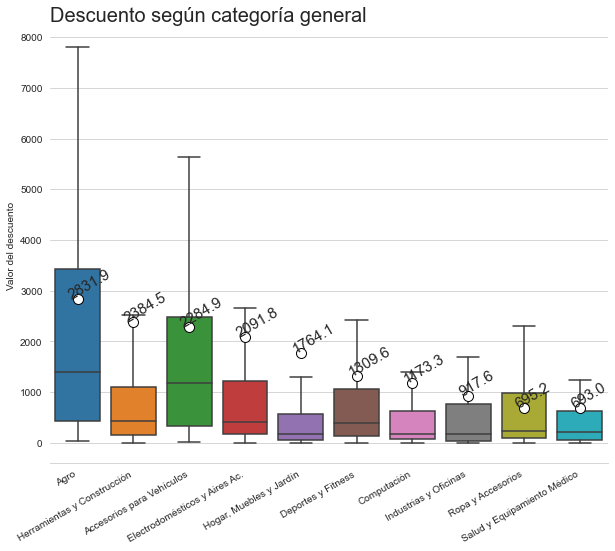

In [9]:
title = 'Descuento según categoría general'
plt.subplots(figsize=(10, 8))
sns.set_style('whitegrid')
data=items_categories.query("mother_name =={}".format(list(agrup_categorias_general.sort_values(by='valor_descuento', ascending=False).index[:10])))
ax = sns.boxplot(x=data.mother_name, y=data.valor_descuento, showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, showfliers = False, order = list(agrup_categorias_general.sort_values(by='valor_descuento', ascending=False).index[:10]))
ax.set_xticklabels( labels=list(agrup_categorias_general.sort_values(by='valor_descuento', ascending=False).index[:10]), rotation=30, horizontalalignment='right')
ax.set(xlabel='', ylabel="Valor del descuento")
ax.axes.set_title(title,fontsize=20, loc='left')
sns.despine(left=True)
for i in range(10):
        plt.text(x = i-0.2 , y = agrup_categorias_general.valor_descuento.sort_values(ascending=False)[i], s = round(agrup_categorias_general.valor_descuento.sort_values(ascending=False)[i], 1), size=15, rotation=30)

Vemos que la categoría *Agro* es la que tiene el valor de descuento más alto, probablemente debido también a que su precio regular promedio debe ser alto. A su vez, notamos una alta dispersión para esta categoría y para *Accesorios para Vehículos*

### Análsis según Categorias

In [10]:
print('Existen {} categorías generales'.format(len(set(items_categories.name))))

Existen 364 categorías generales


In [11]:
agrup_categorias = agrup(items_categories, 'name')

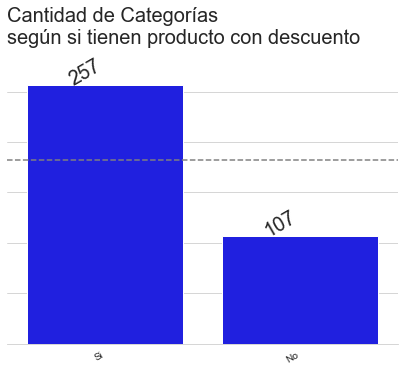

In [12]:
plt.subplots(figsize=(7, 5))
a = pd.Series(pd.DataFrame(agrup_categorias.flg_descuento.apply(lambda x: x >0)).groupby('flg_descuento').size()).sort_values(ascending = False).rename(index = {True: 'Si', False:'No'})
grafico_agrup(a,2,'Cantidad de Categorías\nsegún si tienen producto con descuento\n')

El 70% de las categorías tienen algún producto con descuento

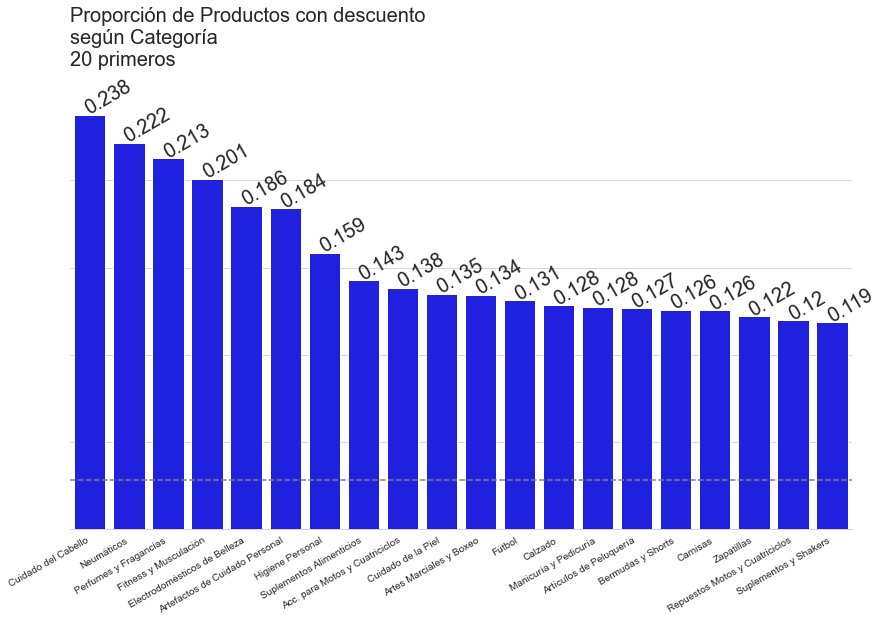

In [13]:
plt.subplots(figsize=(14, 8))
grafico_agrup(agrup_categorias.pct_con_descuento, 20, "Proporción de Productos con descuento\nsegún Categoría \n20 primeros\n")

En coindicencia con el resultado por categoría generales, vemos que dentro del top 5 de categorías con mayor proporción de articulos con descuento hay 3 relacionadas al Cuidado Personal y la Belleza

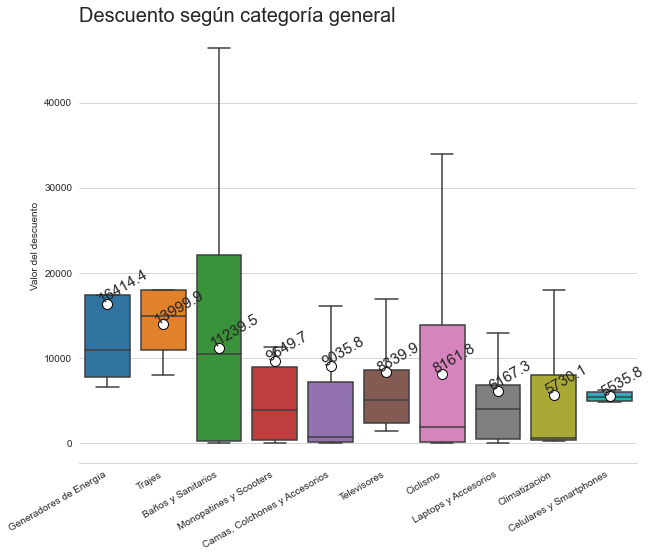

In [14]:
title = 'Descuento según categoría general'
plt.subplots(figsize=(10, 8))
sns.set_style('whitegrid')
data=items_categories.query("name =={}".format(list(agrup_categorias.sort_values(by='valor_descuento', ascending=False).index[:10])))
ax = sns.boxplot(x=data.name, y=data.valor_descuento, showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, showfliers = False, order = list(agrup_categorias.sort_values(by='valor_descuento', ascending=False).index[:10]))
ax.set_xticklabels( labels=list(agrup_categorias.sort_values(by='valor_descuento', ascending=False).index[:10]), rotation=30, horizontalalignment='right')
ax.set(xlabel='', ylabel="Valor del descuento")
ax.axes.set_title(title,fontsize=20, loc='left')
sns.despine(left=True)
for i in range(10):
        plt.text(x = i-0.2 , y = agrup_categorias.valor_descuento.sort_values(ascending=False)[i], s = round(agrup_categorias.valor_descuento.sort_values(ascending=False)[i], 1), size=15, rotation=30)

En este gráfico podemos ver que dos categorías de productos muy discimiles, como *Generadores de Energía* y *Trajes*, son las que presentan los valores de descuento promedio más elevados

#### Análisis de cantidad de productos con descuento por categoría
Este análsis es posible ya que conozco la cantidad total de productos por categoría. A su vez, relizo bootstraping de modo tal de contruir un intervalo de confianza para la estimación

In [15]:
cat_n=[]
for cat in set(items_categories.name):
    for i in range(1000):
        n=items_categories[items_categories.name == cat].flg_descuento.sample(n= categories[categories.name == cat].total_items_in_this_category.values[0], replace=True).sum()    
        cat_n.append({'cat':cat, 'n':n})

cat_n_df = pd.DataFrame(cat_n)

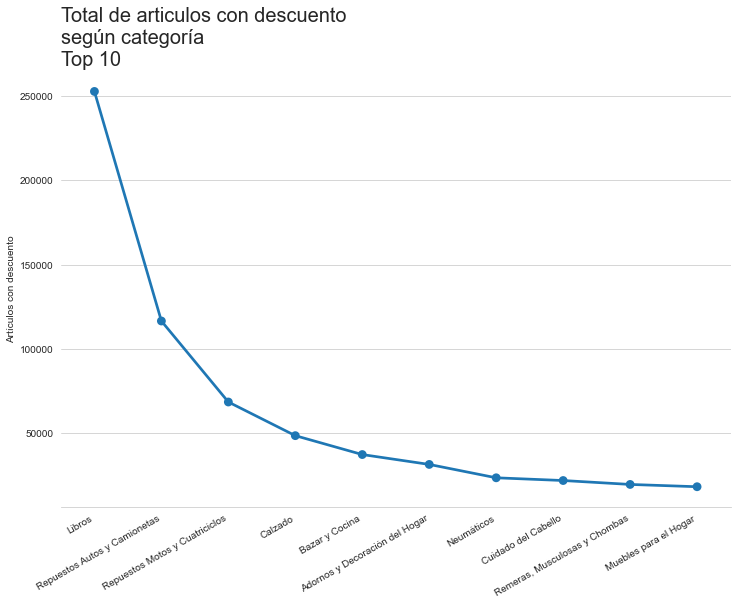

In [16]:
plt.subplots(figsize=(12, 8))
title = 'Total de articulos con descuento\nsegún categoría\nTop 10'
data = cat_n_df.query('cat =={}'.format(list(cat_n_df.groupby('cat').n.mean().sort_values(ascending=False)[:10].index)))
ax=sns.pointplot(x='cat', y='n', data=data, order=list(cat_n_df.groupby('cat').n.mean().sort_values(ascending=False)[:10].index))
ax.set_xticklabels( labels=list(cat_n_df.groupby('cat').n.mean().sort_values(ascending=False)[:10].index), rotation=30, horizontalalignment='right')
ax.set(xlabel='', ylabel='Artículos con descuento')
ax.axes.set_title(title,fontsize=20, loc='left')
sns.despine(left=True)

La categoría *Libros* es la que mayor cantidad de artículos con descuento estimamos tiene, seguida muy por detrás por *Respuestos Autos y Camionetas*

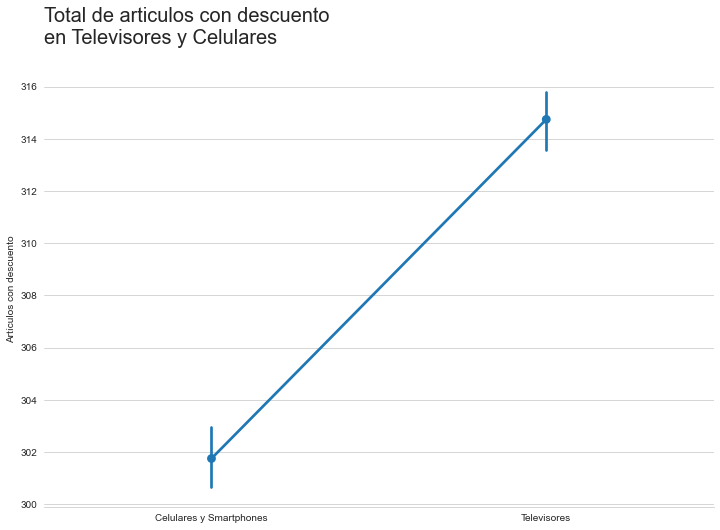

In [17]:
plt.subplots(figsize=(12, 8))
title = 'Total de articulos con descuento\nen Televisores y Celulares\n'
data = cat_n_df[cat_n_df.cat.str.startswith('Televisor') | cat_n_df.cat.str.startswith('Celular')]
ax=sns.pointplot(x='cat', y='n', data=data)
#ax.set_xticklabels( labels=list(cat_n_df.groupby('cat').n.mean().sort_values(ascending=False)[:10].index), rotation=30, horizontalalignment='right')
ax.set(xlabel='', ylabel='Artículos con descuento')
ax.axes.set_title(title,fontsize=20, loc='left')
sns.despine(left=True)

Vemos que la cantidad de Celulares y Televisores con descuentos es mucho menor que la de Libros, rondando valores de 300 y 315 aproximadamente

### Análisis Temporal

In [19]:
#genero variable created_date en formato datetime
items_categories['created_date']= items_categories.daydiff_starttime.apply(lambda x: datetime.datetime.today() + datetime.timedelta(days=x)) 

#genero dataset de los años 2020 y 2019 agrupando la cantidad de articulos con descuento por mes
descuento_año_mes_19_20 = pd.concat([
    items_categories[items_categories.created_date.dt.year == 2019].groupby(items_categories.created_date.dt.month).flg_descuento.sum().rename('2019-{}-01'.format),
    items_categories[items_categories.created_date.dt.year == 2020].groupby(items_categories.created_date.dt.month).flg_descuento.sum().rename('2020-{}-01'.format)]).reset_index()
descuento_año_mes_19_20['created_date']=pd.to_datetime(descuento_año_mes_19_20['created_date'],format='%Y-%m-%d')
descuento_año_mes_19_20['created_year'] = descuento_año_mes_19_20.created_date.dt.year

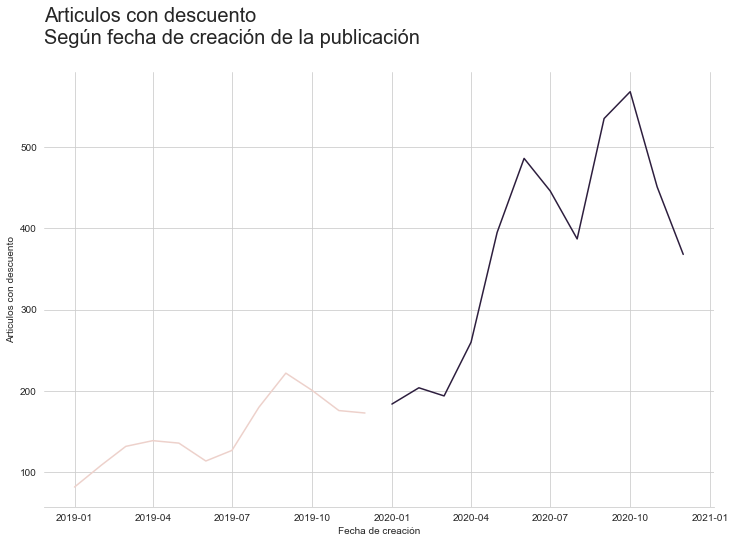

In [27]:
plt.subplots(figsize=(12, 8))
title = 'Articulos con descuento\nSegún fecha de creación de la publicación\n'
ax=sns.lineplot(x='created_date', y='flg_descuento', hue='created_year',data=descuento_año_mes_19_20)
ax.set(xlabel='Fecha de creación', ylabel='Articulos con descuento' )
ax.axes.set_title(title,fontsize=20, loc='left')
sns.despine(left=True)
plt.legend([],[], frameon=False)
plt.show()

Podemos ver un notable aumento en la cantidad de artículos con descuento en el 2020 respecto del año anterior. Sin embargo, es posible observar que cierta temporalidad anual se mantiene con un pico en el meses de septiembre y octubre y una caida en los meses de noviembre y diciembre

### Análisis por localización

In [28]:
agrup_provincia = agrup(items_categories, 'provincia')

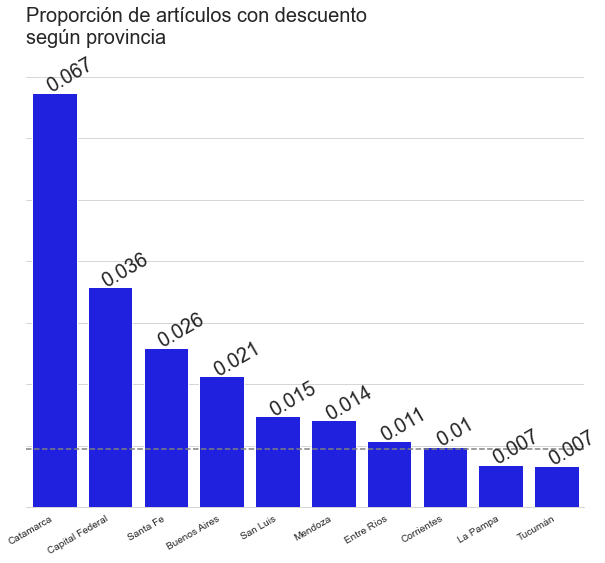

In [29]:
plt.subplots(figsize=(10, 8))
grafico_agrup(agrup_provincia.pct_con_descuento, 10, "Proporción de artículos con descuento\nsegún provincia\n")

Para nuestra sorpresa Catamarca es la provicia con mayor proporción de artículos con descuento. Sin embargo, dado que tiene un n chico en nuestra muestra puede haber una mayor variablidad

Posible mejora, mostrar esta información en forma de mapa